# Fundamentos de Data Science
## Examen Elida Peña
Analizando la Satisfacción de Clientes en la Industria Hotelera

## Requisitos:

Tu tarea es limpiar y explorar un dataset que contiene información sobre la satisfacción de los clientes en la industria hotelera. Este análisis es crucial para los ejecutivos de la empresa que buscan entender mejor las opiniones y experiencias de sus clientes para mejorar los servicios ofrecidos.

El dataset puede ser encontrado aquí.

**1.Limpieza de datos con Python:**
**Detección y eliminación de valores duplicados:** Asegúrate de que cada registro en el dataset sea único.

**Verificación y ajuste de tipos de datos:** Asegúrate de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.

**Consistencia en valores categóricos:** Identifica y corrige cualquier inconsistencia en los valores categóricos (por ejemplo, ‘yes’, ‘Yes’, ‘YES’).

**Manejo de valores faltantes:** Identifica y maneja cualquier valor faltante en el dataset. Rellena los valores faltantes con un marcador adecuado para el tipo de dato.

**Detección de datos anómalos:** Identifica y corrige cualquier punto de dato inapropiado o inusual (por ejemplo, una estancia de 1000 noches).

**2.Exploración de datos con Python:**

**Visualizaciones exploratorias univariadas:** Crea dos tipos diferentes de visualizaciones univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.
**Visualizaciones exploratorias multivariadas:** Crea dos tipos diferentes de visualizaciones multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

**3.Análisis adicional:**
**Estadísticas descriptivas:** Proporciona un resumen estadístico del dataset, incluyendo medidas de tendencia central y dispersión para las variables numéricas.
**Identificación de tendencias:** Analiza y discute cualquier tendencia notable que observes en los datos, apoyándote en las visualizaciones y estadísticas descriptivas.
**Entrega:**

Un archivo .ipynb claramente comentado con todo el código utilizado para la limpieza y exploración de datos. Para cumplir con los requisitos anteriores, este archivo tendrá un mínimo de 4 visualizaciones.
Subir un repositorio a una plataforma de control de versiones (por ejemplo, GitHub) con un TAG incluido para verificar la fecha de entrega. El repositorio debe contener el archivo .ipynb.

**NOTAS:** Debes enviar un archivo y un enlace al repositorio con el TAG correspondiente. Las presentaciones de enlaces sin el archivo o sin el TAG serán consideradas no presentadas.
Notas:

Para evitar que otros estudiantes copien tu trabajo, asegúrate de que el código no esté guardado en un repositorio público.

Para minimizar la deducción de puntos, asegúrate de cargar los requisitos completos.

Si tienes problemas para cargar archivos en la aplicación de exámenes, por favor NO desbloquees otro examen. Envía el archivo por correo electrónico a tu instructor.

Puedes usar cualquier recurso que tengas disponible (notas de clase, Google, Stackoverflow, etc.) – **PERO DEBES CITAR CUALQUIER FUENTE UTILIZADA.** Puedes citar fuentes en forma de comentario de código o una celda de texto con enlaces a cualquier recurso que hayas utilizado. 
La falta de citas será considerada plagio y resultará en la falla del examen.

No puedes recibir ayuda de ninguna otra persona en este código. Esto incluye compañeros de clase, exalumnos, tu instructor, etc. La colaboración con otra persona en este examen será considerada plagio y resultará en la falla del examen y puede resultar en la expulsión del programa.

Se permite el uso de LLM (Copilot, GPT, etc.), pero solo como guía o para depuración. Se espera que los estudiantes pongan su máximo esfuerzo.

In [1]:
#Importaciones de las librerías pandas, numpy y matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Lectura del archivo csv con pandas
#Ejemplo utilizado de la clase del 08/10/2021 https://drive.google.com/drive/folders/1fTyqpWdRh9rIKQCVYlc2eF2HGr8ttHaw
path = '../data/hotel_bookings.csv'
data_frame = pd.read_csv(path, sep=',', header=0)
#data_frame.head()
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## 1.Limpieza de datos con Python:
* Detección y eliminación de valores duplicados: Asegúrate de que cada registro en el dataset sea único.

In [6]:
# Detectar valores duplicados
duplicados = data_frame.duplicated()
#Imprime la cantidad de numeros duplicados
print(f"Número de filas duplicadas: {duplicados.sum()}")
data_frame.head()

Número de filas duplicadas: 31994


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [30]:
# Eliminar valores duplicados
new_data_frame = data_frame.drop_duplicates()

# Verificar que se han eliminado los duplicados
print(f"Número de filas después de eliminar duplicados: {duplicados.sum()}")
data_frame.head()

Número de filas después de eliminar duplicados: 0


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


* Verificación y ajuste de tipos de datos: Asegúrate de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.

In [31]:
# Verificación de los tipos de datos actuales
print(new_data_frame.dtypes)

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [32]:
# Ejemplo de guia que se encuentra en mitic-data-science-team-1-septiembre-2024/clases/ds-fundamentals/pruebas-resueltas
# Diccionario de tipos de datos para las columnas
tipo_datos_diccionario = {
    'hotel': 'string',
    'is_canceled': 'int64',
    'lead_time': 'int64',
    'arrival_date_year': 'int64',
    'arrival_date_month': 'string',  # Mes en texto
    'arrival_date_week_number': 'int64',
    'arrival_date_day_of_month': 'int64',
    'stays_in_weekend_nights': 'int64',
    'stays_in_week_nights': 'int64',
    'adults': 'int64',
    'children': 'float64',  # Puede tener valores decimales o NaN
    'babies': 'int64',
    'meal': 'string',
    'country': 'string',
    'market_segment': 'string',
    'distribution_channel': 'string',
    'is_repeated_guest': 'int64',
    'previous_cancellations': 'int64',
    'previous_bookings_not_canceled': 'int64',
    'reserved_room_type': 'string',
    'assigned_room_type': 'string',
    'booking_changes': 'int64',
    'deposit_type': 'string',
    'agent': 'float64',  # Podría tener NaN, por eso float
    'company': 'float64',  # Igual que agent
    'days_in_waiting_list': 'int64',
    'customer_type': 'string',
    'adr': 'float64',
    'required_car_parking_spaces': 'int64',
    'total_of_special_requests': 'int64',
    'reservation_status': 'string',
    'reservation_status_date': 'datetime64[ns]'  # Fecha
}
for columna, tipo in tipo_datos_diccionario.items():
    # Convertir la columna al tipo de dato especificado en 'diccionario_mapeado'
    new_data_frame.loc[:, columna] = new_data_frame[columna].astype(tipo)

# Verificar los tipos de datos después de aplicar los cambios
print(new_data_frame.dtypes)



hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

* Consistencia en valores categóricos: Identifica y corrige cualquier inconsistencia en los valores categóricos (por ejemplo, ‘yes’, ‘Yes’, ‘YES’).

In [33]:
# Ejemplo de guia que se encuentra en mitic-data-science-team-1-septiembre-2024/clases/ds-fundamentals/pruebas-resueltas
# Seleccionar las columnas categóricas (ya que las convertimos a string antes)
columnas_categoricas = ['hotel', 'meal', 'country', 'market_segment', 
                        'distribution_channel', 'reserved_room_type', 
                        'assigned_room_type', 'deposit_type', 'reservation_status']

# Corregir las inconsistencias en las columnas categóricas convirtiendo todo a minúsculas
for columna in columnas_categoricas:
    new_data_frame[columna] = new_data_frame[columna].str.lower()

# Verificar los valores únicos después de la corrección para ver si las inconsistencias fueron corregidas
for columna in columnas_categoricas:
    # print(f"Valores únicos en la columna '{columna}':")
    # print(new_data_frame[columna].unique())
    # print("-" * 50)
    print(f"Valores únicos en la columna '{columna}':")
    print(new_data_frame[columna].unique())

Valores únicos en la columna 'hotel':
['resort hotel' 'city hotel']
Valores únicos en la columna 'meal':
['bb' 'fb' 'hb' 'sc' 'undefined']
Valores únicos en la columna 'country':
['prt' 'gbr' 'usa' 'esp' 'irl' 'fra' <NA> 'rou' 'nor' 'omn' 'arg' 'pol'
 'deu' 'bel' 'che' 'cn' 'grc' 'ita' 'nld' 'dnk' 'rus' 'swe' 'aus' 'est'
 'cze' 'bra' 'fin' 'moz' 'bwa' 'lux' 'svn' 'alb' 'ind' 'chn' 'mex' 'mar'
 'ukr' 'smr' 'lva' 'pri' 'srb' 'chl' 'aut' 'blr' 'ltu' 'tur' 'zaf' 'ago'
 'isr' 'cym' 'zmb' 'cpv' 'zwe' 'dza' 'kor' 'cri' 'hun' 'are' 'tun' 'jam'
 'hrv' 'hkg' 'irn' 'geo' 'and' 'gib' 'ury' 'jey' 'caf' 'cyp' 'col' 'ggy'
 'kwt' 'nga' 'mdv' 'ven' 'svk' 'fji' 'kaz' 'pak' 'idn' 'lbn' 'phl' 'sen'
 'syc' 'aze' 'bhr' 'nzl' 'tha' 'dom' 'mkd' 'mys' 'arm' 'jpn' 'lka' 'cub'
 'cmr' 'bih' 'mus' 'com' 'sur' 'uga' 'bgr' 'civ' 'jor' 'syr' 'sgp' 'bdi'
 'sau' 'vnm' 'plw' 'qat' 'egy' 'per' 'mlt' 'mwi' 'ecu' 'mdg' 'isl' 'uzb'
 'npl' 'bhs' 'mac' 'tgo' 'twn' 'dji' 'stp' 'kna' 'eth' 'irq' 'hnd' 'rwa'
 'khm' 'mco' 'bgd' '

C:\Users\59598\AppData\Local\Temp\ipykernel_15352\2239108328.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_frame[columna] = new_data_frame[columna].str.lower()


* Manejo de valores faltantes: Identifica y maneja cualquier valor faltante en el dataset. Rellena los valores faltantes con un marcador adecuado para el tipo de dato.

In [34]:
# Verificar cuántos valores faltantes hay en cada columna
valores_faltantes = new_data_frame.isnull().sum()
print(valores_faltantes)

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


In [36]:
# Ejemplo de guia que se encuentra en mitic-data-science-team-1-septiembre-2024/clases/ds-fundamentals/pruebas-resueltas
# total de filas sin valores faltantes por columna
rows_without_missing = new_data_frame.shape[0] - new_data_frame.isnull().sum(axis=0)

# Total de valores faltantes por columna
missing_values = new_data_frame.isnull().sum(axis=0)

# Porcentaje de valores faltantes por columna
percentage_missing = round(100 * (new_data_frame.isnull().sum(axis=0) / new_data_frame.shape[0]), 2)

# Crea un DataFrame para mostrar estos resultados
missing_summary = pd.DataFrame({
    'Rows without Missing': rows_without_missing,
    'Missing Values': missing_values,
    'Percentage Missing': percentage_missing
})

# Ordenar el DataFrame por porcentaje de valores faltantes en orden descendente
missing_summary_sorted = missing_summary.sort_values(by='Percentage Missing', ascending=False)

# Mostrar el resultado
print(missing_summary_sorted)

                                Rows without Missing  Missing Values  \
company                                         5259           82137   
agent                                          75203           12193   
country                                        86944             452   
hotel                                          87396               0   
arrival_date_month                             87396               0   
arrival_date_week_number                       87396               0   
lead_time                                      87396               0   
is_canceled                                    87396               0   
stays_in_weekend_nights                        87396               0   
stays_in_week_nights                           87396               0   
children                                       87392               4   
adults                                         87396               0   
babies                                         87396            

In [38]:
# Ejemplo de guia que se encuentra en mitic-data-science-team-1-septiembre-2024/clases/ds-fundamentals/pruebas-resueltas
# Completa los valores faltantes en las columnas numéricas con la media o un valor fijo
new_data_frame.loc[:,'children'] = new_data_frame['children'].fillna(new_data_frame['children'].mean())
new_data_frame.loc[:,'agent'] = new_data_frame['agent'].fillna(0)
new_data_frame.loc[:,'company'] = new_data_frame['company'].fillna(0)

# Completa los valores faltantes en las columnas categóricas con 'desconocido'
new_data_frame.loc[:,'country'] = new_data_frame['country'].fillna('Desconocido')

# Comprueba si faltan valores
missing_values_after = new_data_frame.isnull().sum()
print(missing_values_after)


hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

* Detección de datos anómalos: Identifica y corrige cualquier punto de dato inapropiado o inusual (por ejemplo, una estancia de 1000 noches).

In [46]:
# Ejemplo de guia que se encuentra en mitic-data-science-team-1-septiembre-2024/clases/ds-fundamentals/pruebas-resueltas
# Identificar filas con estancias de más de 1000 noches en 'stays_in_week_nights' y 'stays_in_weekend_nights'
invalid_stays = new_data_frame[(new_data_frame['stays_in_week_nights'] > 1000) | 
                               (new_data_frame['stays_in_weekend_nights'] > 1000)]

# Mostrar cuántas estancias inválidas fueron encontradas
print(f"Registros con estancias inválidas: {invalid_stays.shape[0]}")
print(invalid_stays[['hotel', 'stays_in_week_nights', 'stays_in_weekend_nights']])


Registros con estancias inválidas: 0
Empty DataFrame
Columns: [hotel, stays_in_week_nights, stays_in_weekend_nights]
Index: []


In [47]:
# Ejemplo de guia que se encuentra en mitic-data-science-team-1-septiembre-2024/clases/ds-fundamentals/pruebas-resueltas
# Detectar valores de 'adults', 'children' y 'babies' que sean negativos
invalid_people = new_data_frame[(new_data_frame['adults'] < 0) | 
                                (new_data_frame['children'] < 0) | 
                                (new_data_frame['babies'] < 0)]

# Mostrar cuántos registros tienen valores inválidos en 'adults', 'children', o 'babies'
print(f"Registros con valores inválidos en 'adults', 'children', o 'babies': {invalid_people.shape[0]}")
print(invalid_people[['adults', 'children', 'babies']])


Registros con valores inválidos en 'adults', 'children', o 'babies': 0
Empty DataFrame
Columns: [adults, children, babies]
Index: []


In [49]:
# Ejemplo de guia que se encuentra en mitic-data-science-team-1-septiembre-2024/clases/ds-fundamentals/pruebas-resueltas
# Obtener la fecha actual
current_date = pd.Timestamp.today()

# Identificar filas con fechas futuras en 'reservation_status_date'
future_reservations = new_data_frame[new_data_frame['reservation_status_date'] > current_date]

# Mostrar cuántos registros tienen fechas futuras
print(f"Número de registros con fechas de reservación futuras: {future_reservations.shape[0]}")
print(future_reservations[['hotel', 'reservation_status_date']])

Número de registros con fechas de reservación futuras: 0
Empty DataFrame
Columns: [hotel, reservation_status_date]
Index: []


## 2.Exploración de datos con Python:
* Visualizaciones exploratorias univariadas: Crea dos tipos diferentes de visualizaciones univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

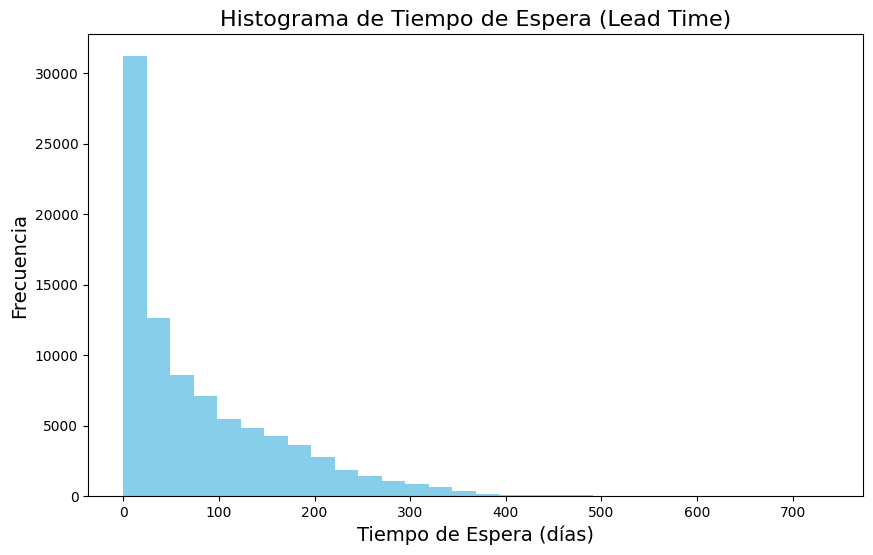

In [50]:
# Ejemplo de guia que se encuentra en mitic-data-science-team-1-septiembre-2024/clases/ds-fundamentals/pruebas-resueltas
# Filtrar los valores no nulos de 'lead_time'
lead_time_no_na = new_data_frame['lead_time'].dropna()

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear el histograma
plt.hist(lead_time_no_na, bins=30, color='skyblue')

# Añadir títulos y etiquetas
plt.title('Histograma de Tiempo de Espera (Lead Time)', fontsize=16)
plt.xlabel('Tiempo de Espera (días)', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Mostrar el gráfico
plt.show()

# Breve interpretación:
# Este histograma muestra la distribución del tiempo de espera en días para las reservas de hotel. Se puede observar qué tan frecuentemente ciertos tiempos de espera ocurren y ver si hay tiempos de espera particularmente comunes.

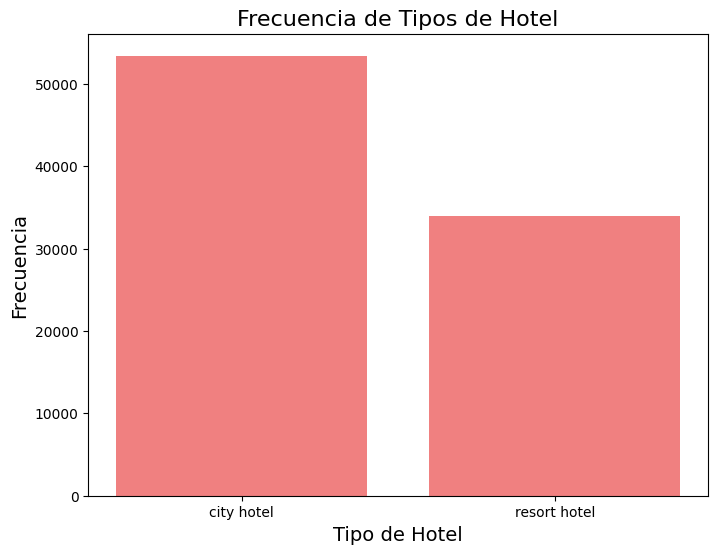

In [51]:
# Ejemplo de guia que se encuentra en mitic-data-science-team-1-septiembre-2024/clases/ds-fundamentals/pruebas-resueltas
# Contar la frecuencia de cada tipo de hotel
hotel_counts = new_data_frame['hotel'].value_counts()

# Configurar el tamaño del gráfico
plt.figure(figsize=(8, 6))

# Crear el gráfico de barras
plt.bar(hotel_counts.index, hotel_counts.values, color='lightcoral')

# Añadir títulos y etiquetas
plt.title('Frecuencia de Tipos de Hotel', fontsize=16)
plt.xlabel('Tipo de Hotel', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Mostrar el gráfico
plt.show()
#Breve interpretación:
#Este gráfico de barras muestra la cantidad de reservas para cada tipo de hotel (por ejemplo, Resort Hotel y City Hotel). Se puede ver qué tipo de hotel es el más popular entre los clientes.

*Visualizaciones exploratorias multivariadas: Crea dos tipos diferentes de visualizaciones multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

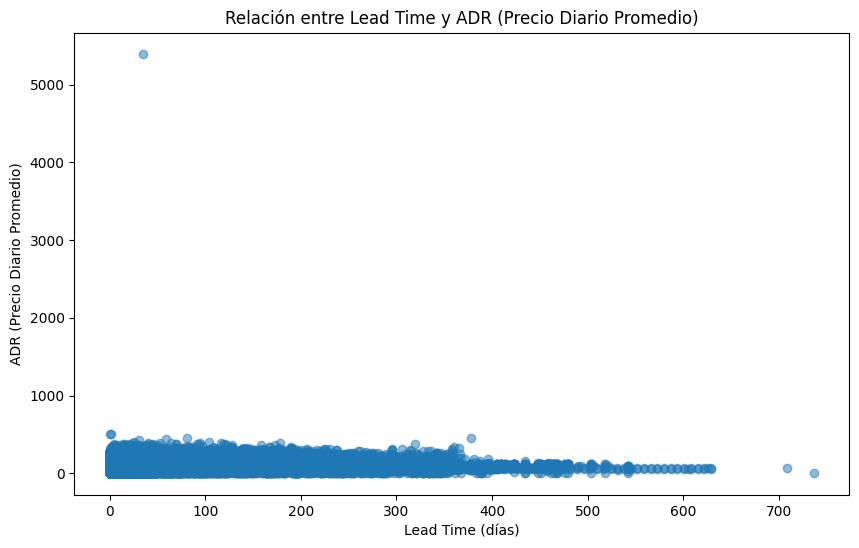

In [52]:
# Ejemplo de guia que se encuentra en mitic-data-science-team-1-septiembre-2024/clases/ds-fundamentals/pruebas-resueltas
# Crear un gráfico de dispersión entre lead_time (días de anticipación) y adr (precio diario promedio)
plt.figure(figsize=(10, 6))
plt.scatter(new_data_frame['lead_time'], new_data_frame['adr'], alpha=0.5)
plt.title('Relación entre Lead Time y ADR (Precio Diario Promedio)')
plt.xlabel('Lead Time (días)')
plt.ylabel('ADR (Precio Diario Promedio)')
plt.show()
#Interpretación: 
# El scatter plot nos permite observar si hay alguna relación entre la cantidad de días de anticipación y el precio diario promedio pagado por los huéspedes.

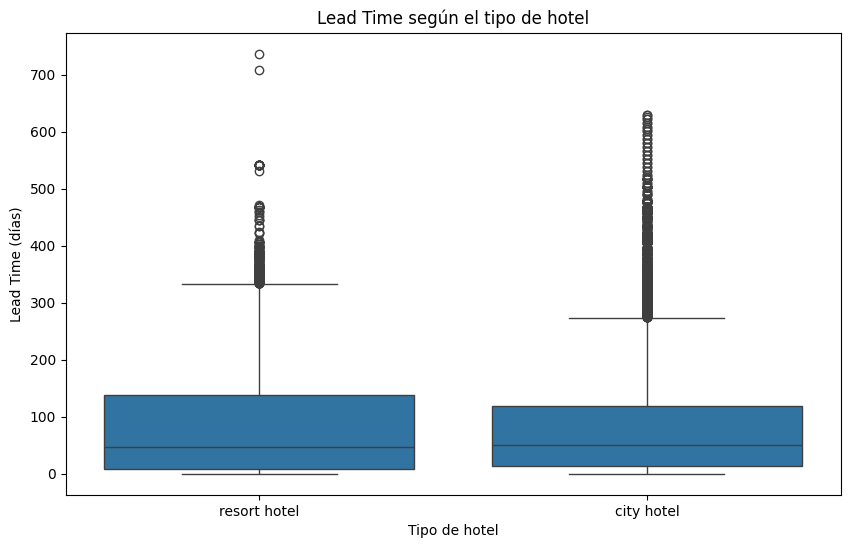

In [54]:
# Ejemplo de guia que se encuentra en mitic-data-science-team-1-septiembre-2024/clases/ds-fundamentals/pruebas-resueltas
# Crear un boxplot para comparar el lead_time entre diferentes tipos de hotel
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x='hotel', y='lead_time', data=new_data_frame)
plt.title('Lead Time según el tipo de hotel')
plt.xlabel('Tipo de hotel')
plt.ylabel('Lead Time (días)')
plt.show()
#Interpretación: 
# El box plot muestra la distribución del lead_time para cada tipo de hotel (Resort Hotel y City Hotel). Esto ayuda a entender si hay diferencias significativas en el comportamiento de reserva de los huéspedes según el tipo de hotel.



## 3.Análisis adicional:
*Estadísticas descriptivas: Proporciona un resumen estadístico del dataset, incluyendo medidas de tendencia central y dispersión para las variables numéricas.

In [55]:
# Ejemplo de guia que se encuentra en mitic-data-science-team-1-septiembre-2024/clases/ds-fundamentals/semana-3/valores_nulos_2.ipynb
# Generar estadísticas descriptivas de las variables numéricas
estadisticas_descriptivas = new_data_frame.describe()

# Mostrar el resultado de las estadísticas
print(estadisticas_descriptivas)
# Interpretación breve
# 1. El tiempo promedio de reserva (lead_time) es de aproximadamente 80 días.
# 2. La tasa de cancelación es de alrededor del 27%, lo que indica una posible área de mejora en la gestión de reservas.
# 3. Los huéspedes suelen quedarse una media de 2 a 3 noches tanto en días de semana como en fines de semana.
# 4. Revisar valores máximos como estancias de más de 5 noches y lead times de más de 700 días para detectar posibles valores anómalos o extremos.

        is_canceled     lead_time  arrival_date_year  \
count  87396.000000  87396.000000       87396.000000   
mean       0.274898     79.891368        2016.210296   
std        0.446466     86.052325           0.686102   
min        0.000000      0.000000        2015.000000   
25%        0.000000     11.000000        2016.000000   
50%        0.000000     49.000000        2016.000000   
75%        1.000000    125.000000        2017.000000   
max        1.000000    737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count              87396.000000               87396.000000   
mean                  26.838334                  15.815541   
std                   13.674572                   8.835146   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   27.000000                  16.000000   
75%                   37.000000                  23.000000   

*Identificación de tendencias: Analiza y discute cualquier tendencia notable que observes en los datos, apoyándote en las visualizaciones y estadísticas descriptivas.

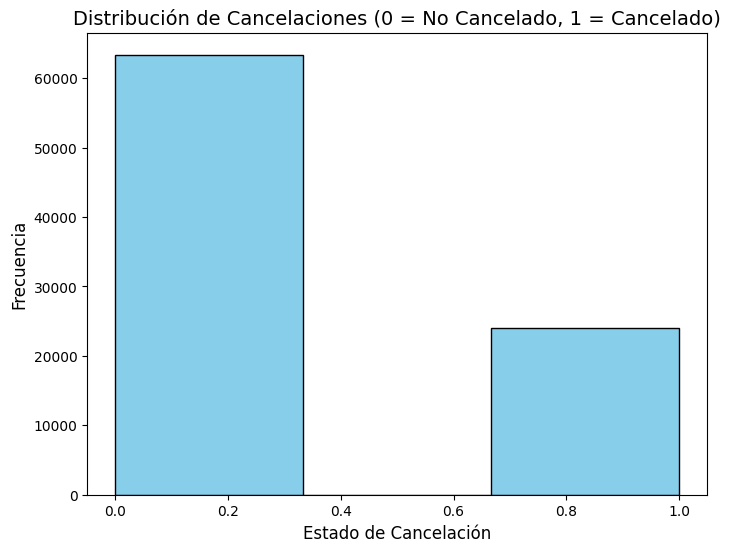

In [61]:
# Guida de ejemplo de clase mitic-data-science-team-1-septiembre-2024/clases/ds-fundamentals/semana-3/visualizaciones.ipynb
# Grafico distribución de cancelaciones
plt.figure(figsize=(8, 6))
plt.hist(new_data_frame['is_canceled'], bins=3, color='skyblue', edgecolor='black')
plt.title('Distribución de Cancelaciones (0 = No Cancelado, 1 = Cancelado)', fontsize=14)
plt.xlabel('Estado de Cancelación', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()
#Descripción: El gráfico muestra la distribución de las cancelaciones de reservas. Se observa que la mayoría de las reservas no fueron canceladas (representadas por el valor 0), mientras que una menor cantidad fueron canceladas (valor 1).
#Conclusión: La mayoría de los clientes completan sus reservas sin cancelarlas. Sin embargo, un porcentaje significativo de reservas fue cancelado, lo que podría ser analizado más a fondo para entender las causas.


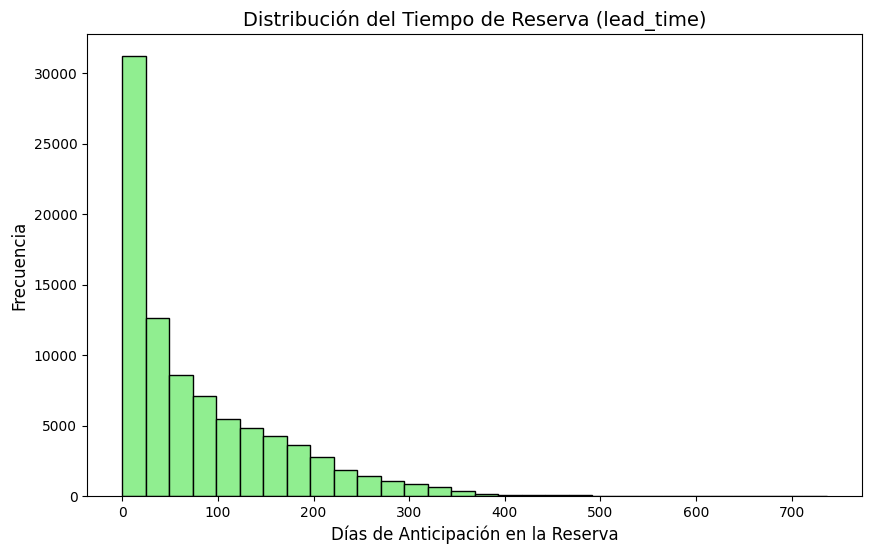

In [59]:
# Guida de ejemplo de clase mitic-data-science-team-1-septiembre-2024/clases/ds-fundamentals/semana-3/visualizaciones.ipynb
# Grafico Distribución del Tiempo de Reserva (lead_time):
plt.figure(figsize=(10, 6))
plt.hist(new_data_frame['lead_time'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribución del Tiempo de Reserva (lead_time)', fontsize=14)
plt.xlabel('Días de Anticipación en la Reserva', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()
#Descripción: Este histograma muestra la distribución de los días de anticipación en los que se realizan las reservas. Se observa que la mayoría de las reservas se hacen con pocos días de anticipación, y muy pocas con una mayor anticipación (más de 100 días).
#Conclusión: La mayoría de los clientes tiende a reservar con poca antelación, lo que sugiere que muchas reservas se realizan a corto plazo, algo común en hoteles.

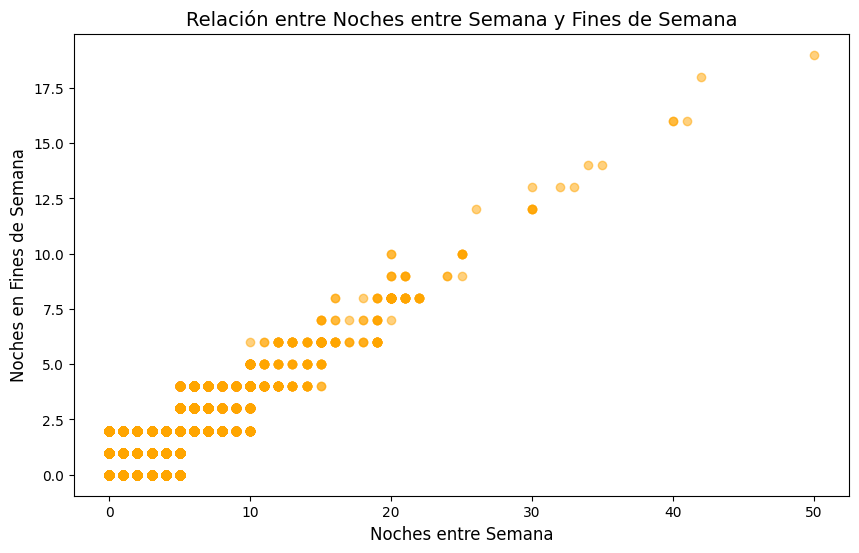

In [60]:
# Guida de ejemplo de clase mitic-data-science-team-1-septiembre-2024/clases/ds-fundamentals/semana-3/visualizaciones.ipynb
#Relación entre Noches entre Semana y Fines de Semana:
plt.figure(figsize=(10, 6))
plt.scatter(new_data_frame['stays_in_week_nights'], new_data_frame['stays_in_weekend_nights'], alpha=0.5, color='orange')
plt.title('Relación entre Noches entre Semana y Fines de Semana', fontsize=14)
plt.xlabel('Noches entre Semana', fontsize=12)
plt.ylabel('Noches en Fines de Semana', fontsize=12)
plt.show()
#Descripción: Este gráfico de dispersión muestra la relación entre las noches que los clientes se quedan entre semana y los fines de semana. 
# Se observa una tendencia lineal en la que, a medida que los clientes se quedan más noches entre semana, también tienden a quedarse más noches durante el fin de semana.
#Conclusión: Existe una correlación positiva entre las noches de estancia en semana y fines de semana. 
# Esto indica que los clientes que tienden a quedarse durante más días entre semana también lo hacen los fines de semana.